In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from src import plotter
import pandas as pd
import numpy as np
import scipy.stats as stats
import pyspark as ps
import pyspark.sql.functions as F
 
# Data Visualization
import squarify
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon, shape




In [2]:
# Import data previously saved as csv
crime_2003 = pd.read_csv('data/2003.csv')
crime_2004 = pd.read_csv('data/2004.csv')
crime_2005 = pd.read_csv('data/2005.csv')
crime_2006 = pd.read_csv('data/2006.csv')
crime_2007 = pd.read_csv('data/2007.csv')
crime_2008 = pd.read_csv('data/2008.csv')
crime_2009 = pd.read_csv('data/2009.csv')
crime_2010 = pd.read_csv('data/2010.csv')
crime_2011 = pd.read_csv('data/2011.csv')
crime_2012 = pd.read_csv('data/2012.csv')
crime_2013 = pd.read_csv('data/2013.csv')
crime_2014 = pd.read_csv('data/2014.csv')
crime_2015 = pd.read_csv('data/2015.csv')
crime_2016 = pd.read_csv('data/2016.csv')
crime_2017 = pd.read_csv('data/2017.csv')

In [3]:
crime_years = [crime_2003, crime_2004, crime_2005, crime_2006, crime_2007, crime_2008, 
               crime_2009, crime_2010, crime_2011, crime_2012, crime_2013, crime_2014, 
               crime_2015, crime_2016, crime_2017]

years = ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
         '2013', '2014', '2015', '2016', '2017']

In [ ]:
# Testing helper functions
array, lat, long, mag = plotter.binning(crime_2003)
plotter.plot_scatter(crime_2013, '2013')

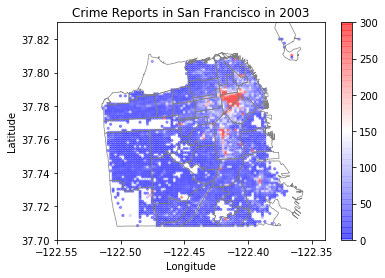

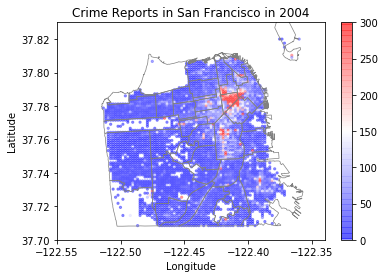

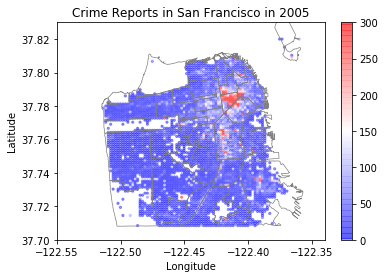

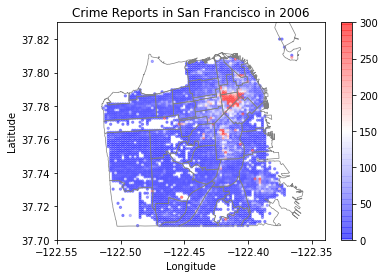

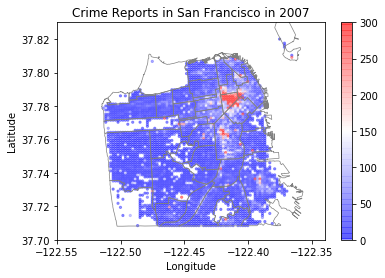

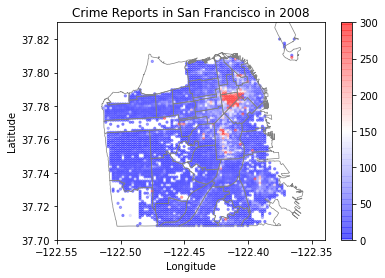

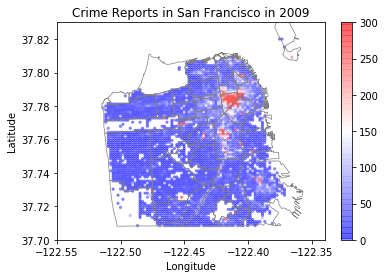

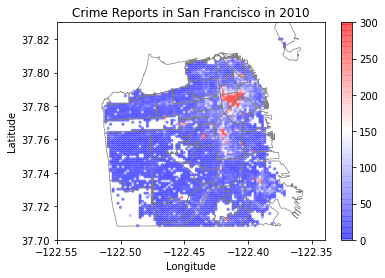

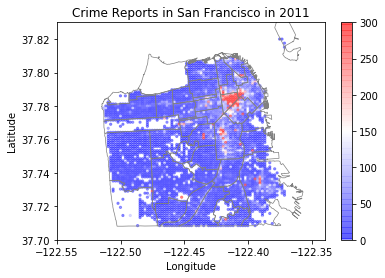

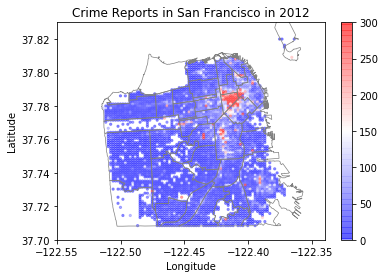

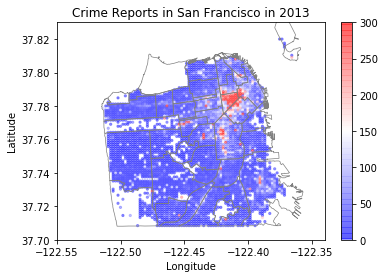

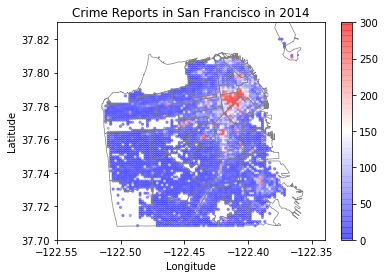

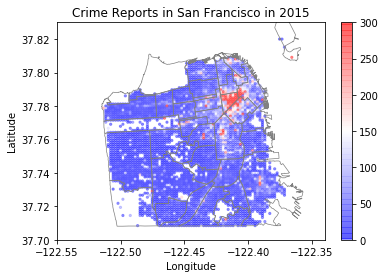

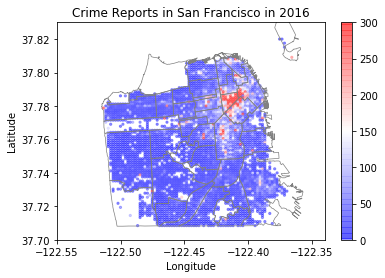

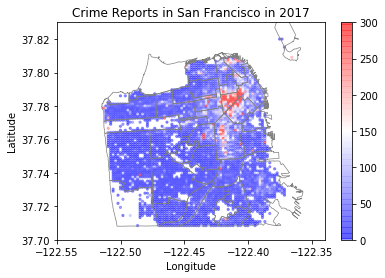

In [55]:
# Create scatter plot of data
for year, data in zip(years, crime_years):
    plotter.plot_scatter(data, year)

In [10]:
crime_map = pd.DataFrame({'Lat': pd.Series(lat),
                              'Long': pd.Series(long),
                              'Count': pd.Series(mag)})
crime_map.replace(to_replace=0.0, value=np.nan, inplace=True)   


In [ ]:
import plotly.express as px
fig = px.density_mapbox(df, lat=crime_2003, lon=crime_2003['Y'], z='Magnitude', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

In [9]:
# Create subset of data for testing gaussian kde
subset = crime_2003.iloc[:20000, :]
array, lat, long, mag = plotter.binning(subset)
print(len(lat), len(long), len(mag))

10000 10000 10000


(50000,)
(50000,)


(-122.6, -122.3)

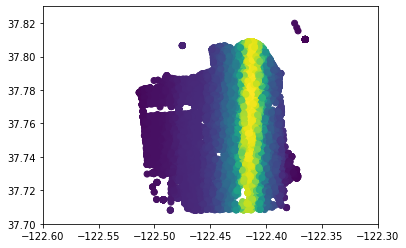

In [36]:
# Attempting to use gaussian kde for scatter plot. This never ended up working
xy = np.vstack([subset['X'], subset['Y']])
z = stats.gaussian_kde(xy)(xy) # This defines the heat map aspect
print(z.shape)
print(subset['X'].shape)
plt.scatter(subset['X'], subset['Y'], c=z, alpha=.4)
plt.ylim(37.7,37.83)
plt.xlim(-122.6, -122.3)

![alttext](data/images/car_theft.png)